In [7]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
#Get probability distribution files for weak generalization - Standard set transformer
wg_pt_path1 = './probability_output_files/Weak_Generalization/64_16_128_3_0.05/'
wg_pt_output_files1 = [file for file in os.listdir(wg_pt_path1) if file.startswith('output_file_') and file.endswith('.csv')]

#Get probability distribution files for strong generalization - Standard set transformer
sg_pt_path1 = './probability_output_files/Strong_Generalization/64_16_128_3_0.05/'
sg_pt_output_files1 = [file for file in os.listdir(sg_pt_path1) if file.startswith('output_file_') and file.endswith('.csv')]

#Get probability distribution files for weak generalization - contrastive pre-trained model
wg_pt_path2 = './probability_output_files/Weak_Generalization/masked_encoder_64_16_128_3_0.05/'
wg_pt_output_files2 = [file for file in os.listdir(wg_pt_path2) if file.startswith('output_file_') and file.endswith('.csv')]

#Get probability distribution files for strong generalization - contrastive pre-trained model
sg_pt_path2 = './probability_output_files/Strong_Generalization/masked_encoder_64_16_128_3_0.05/'
sg_pt_output_files2 = [file for file in os.listdir(sg_pt_path2) if file.startswith('output_file_') and file.endswith('.csv')]

In [9]:
def concat(path, output_files):
    df_dict = {}
    for i, file in enumerate(output_files):
        df_dict[f'df_{i+1}'] = pd.read_csv(path+file)
        df_dict[f'df_{i+1}'].columns = df_dict[f'df_{i+1}'].columns.astype(int)
        
    return df_dict
    
wg_pt_df_dict1 = concat(wg_pt_path1, wg_pt_output_files1)
sg_pt_df_dict1 = concat(sg_pt_path1, sg_pt_output_files1)
wg_pt_df_dict2 = concat(wg_pt_path2, wg_pt_output_files2)
sg_pt_df_dict2 = concat(sg_pt_path2, sg_pt_output_files2)

In [10]:
# Create a 3D matrix from the DataFrames
wg_pt_data_matrix1 = np.array([df1.values for df1 in wg_pt_df_dict1.values()])
sg_pt_data_matrix1 = np.array([df1.values for df1 in sg_pt_df_dict1.values()])
wg_pt_data_matrix2 = np.array([df1.values for df1 in wg_pt_df_dict2.values()])
sg_pt_data_matrix2 = np.array([df1.values for df1 in sg_pt_df_dict2.values()])

In [11]:
# Calculate the mean along the first axis (axis=0)
# To combine all individual run
wg_pt_combined_matrix1 = np.mean(wg_pt_data_matrix1, axis=0)
sg_pt_combined_matrix1 = np.mean(sg_pt_data_matrix1, axis=0)
wg_pt_combined_matrix2 = np.mean(wg_pt_data_matrix2, axis=0)
sg_pt_combined_matrix2 = np.mean(sg_pt_data_matrix2, axis=0)

In [16]:
def plot_confusion_matrx(matrix):
    # Plot the heatmap
    plt.figure(figsize=(90, 90))
    sns.set(font_scale=2.0) 
    sns.heatmap(matrix, cmap='Blues', annot=True, fmt='.2f')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

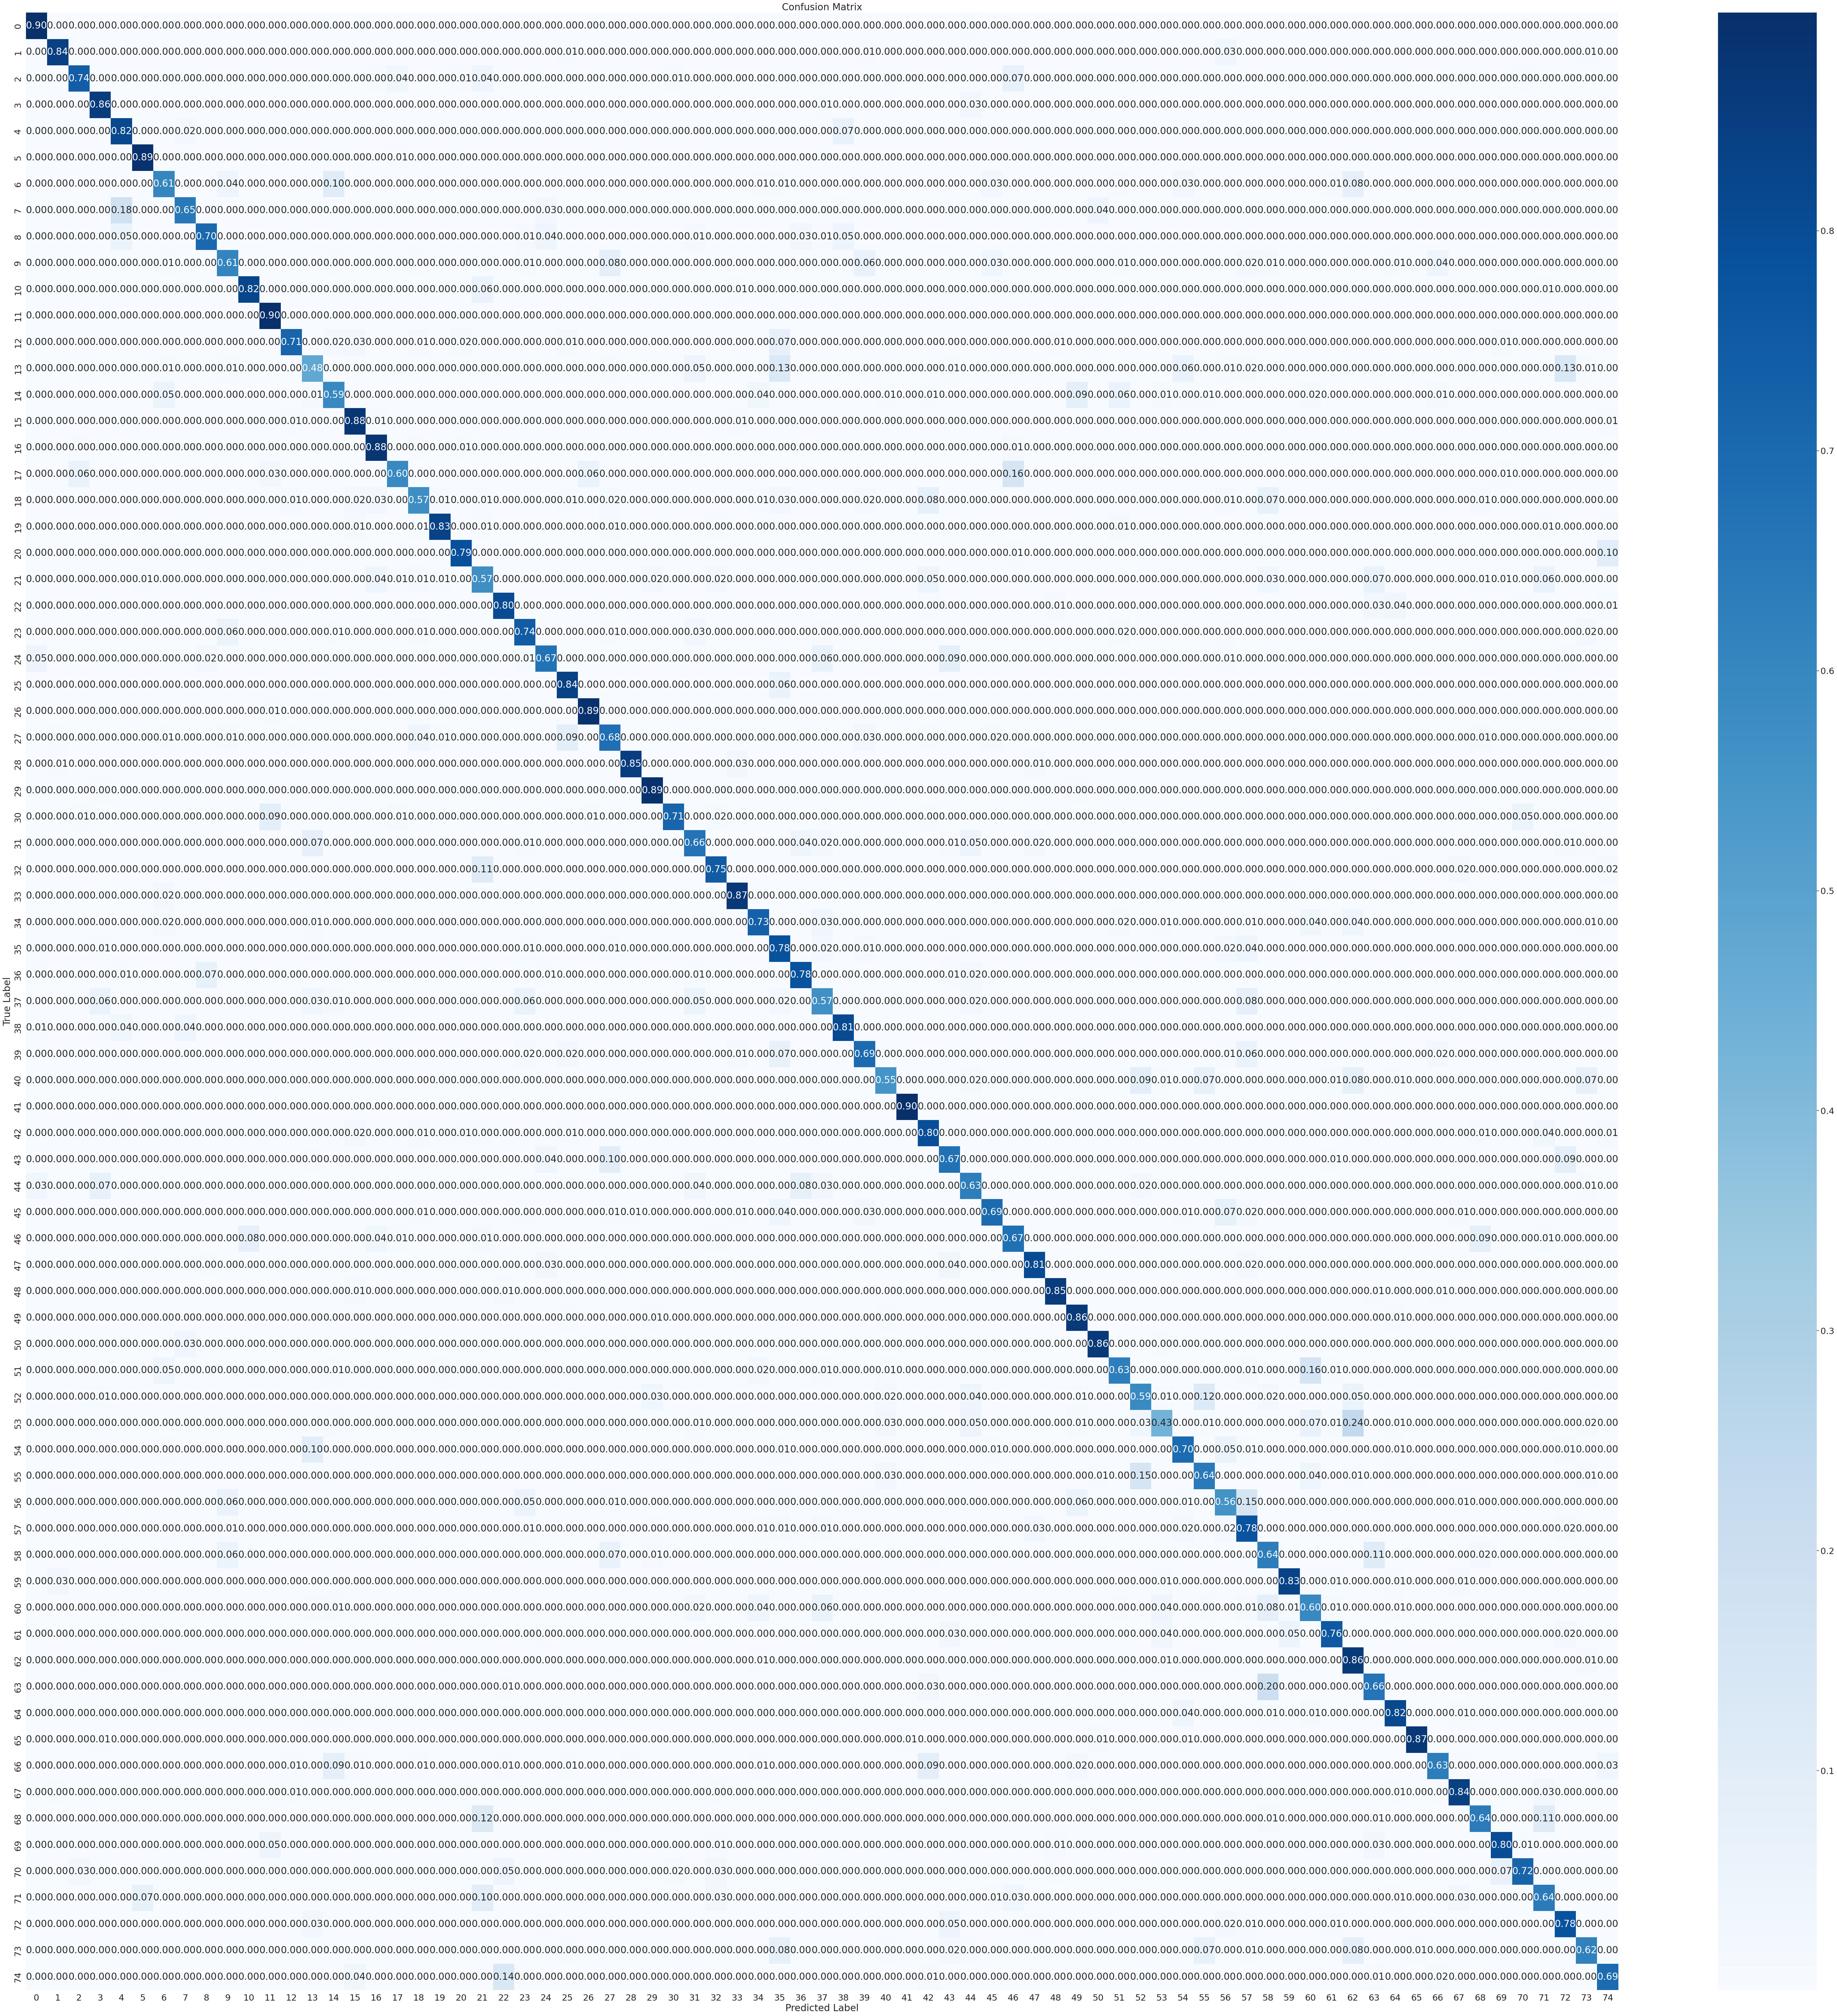

In [17]:
# Plot for standard Set Transformer weak generalization
plot_confusion_matrx(wg_pt_combined_matrix1)

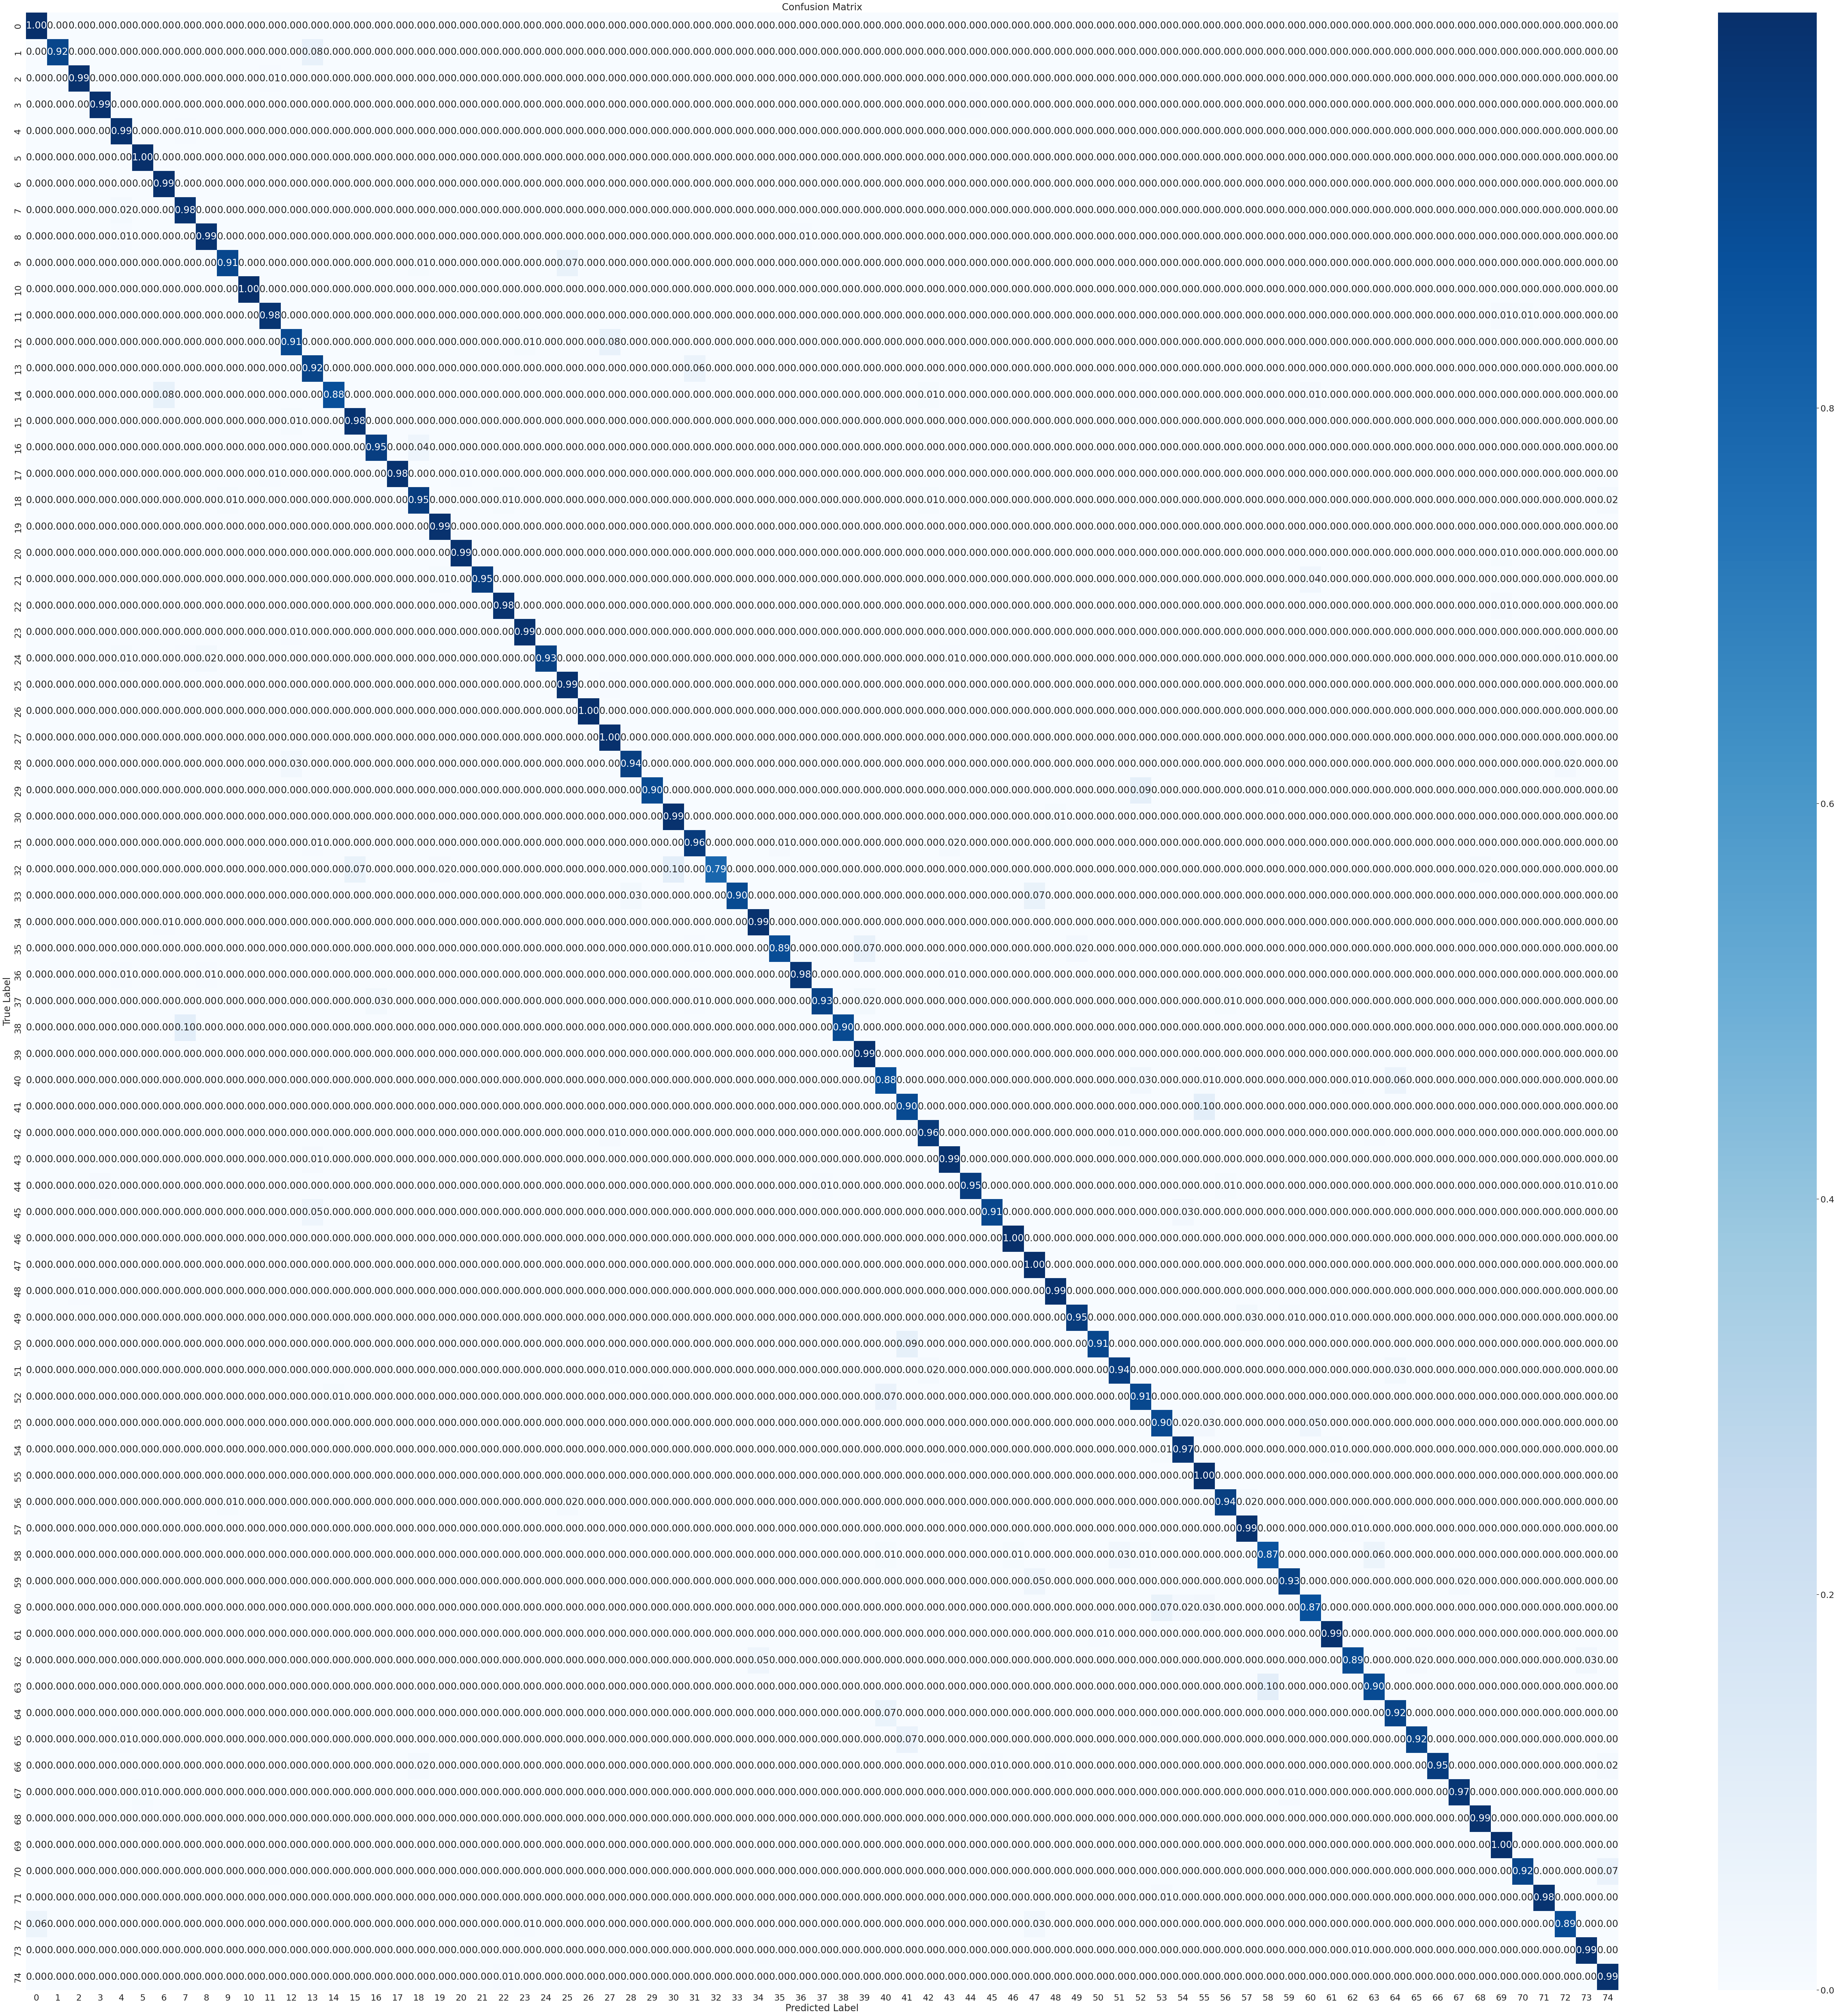

In [18]:
# Plot for Contrastive Pretrained model weak generalization
plot_confusion_matrx(wg_pt_combined_matrix2)

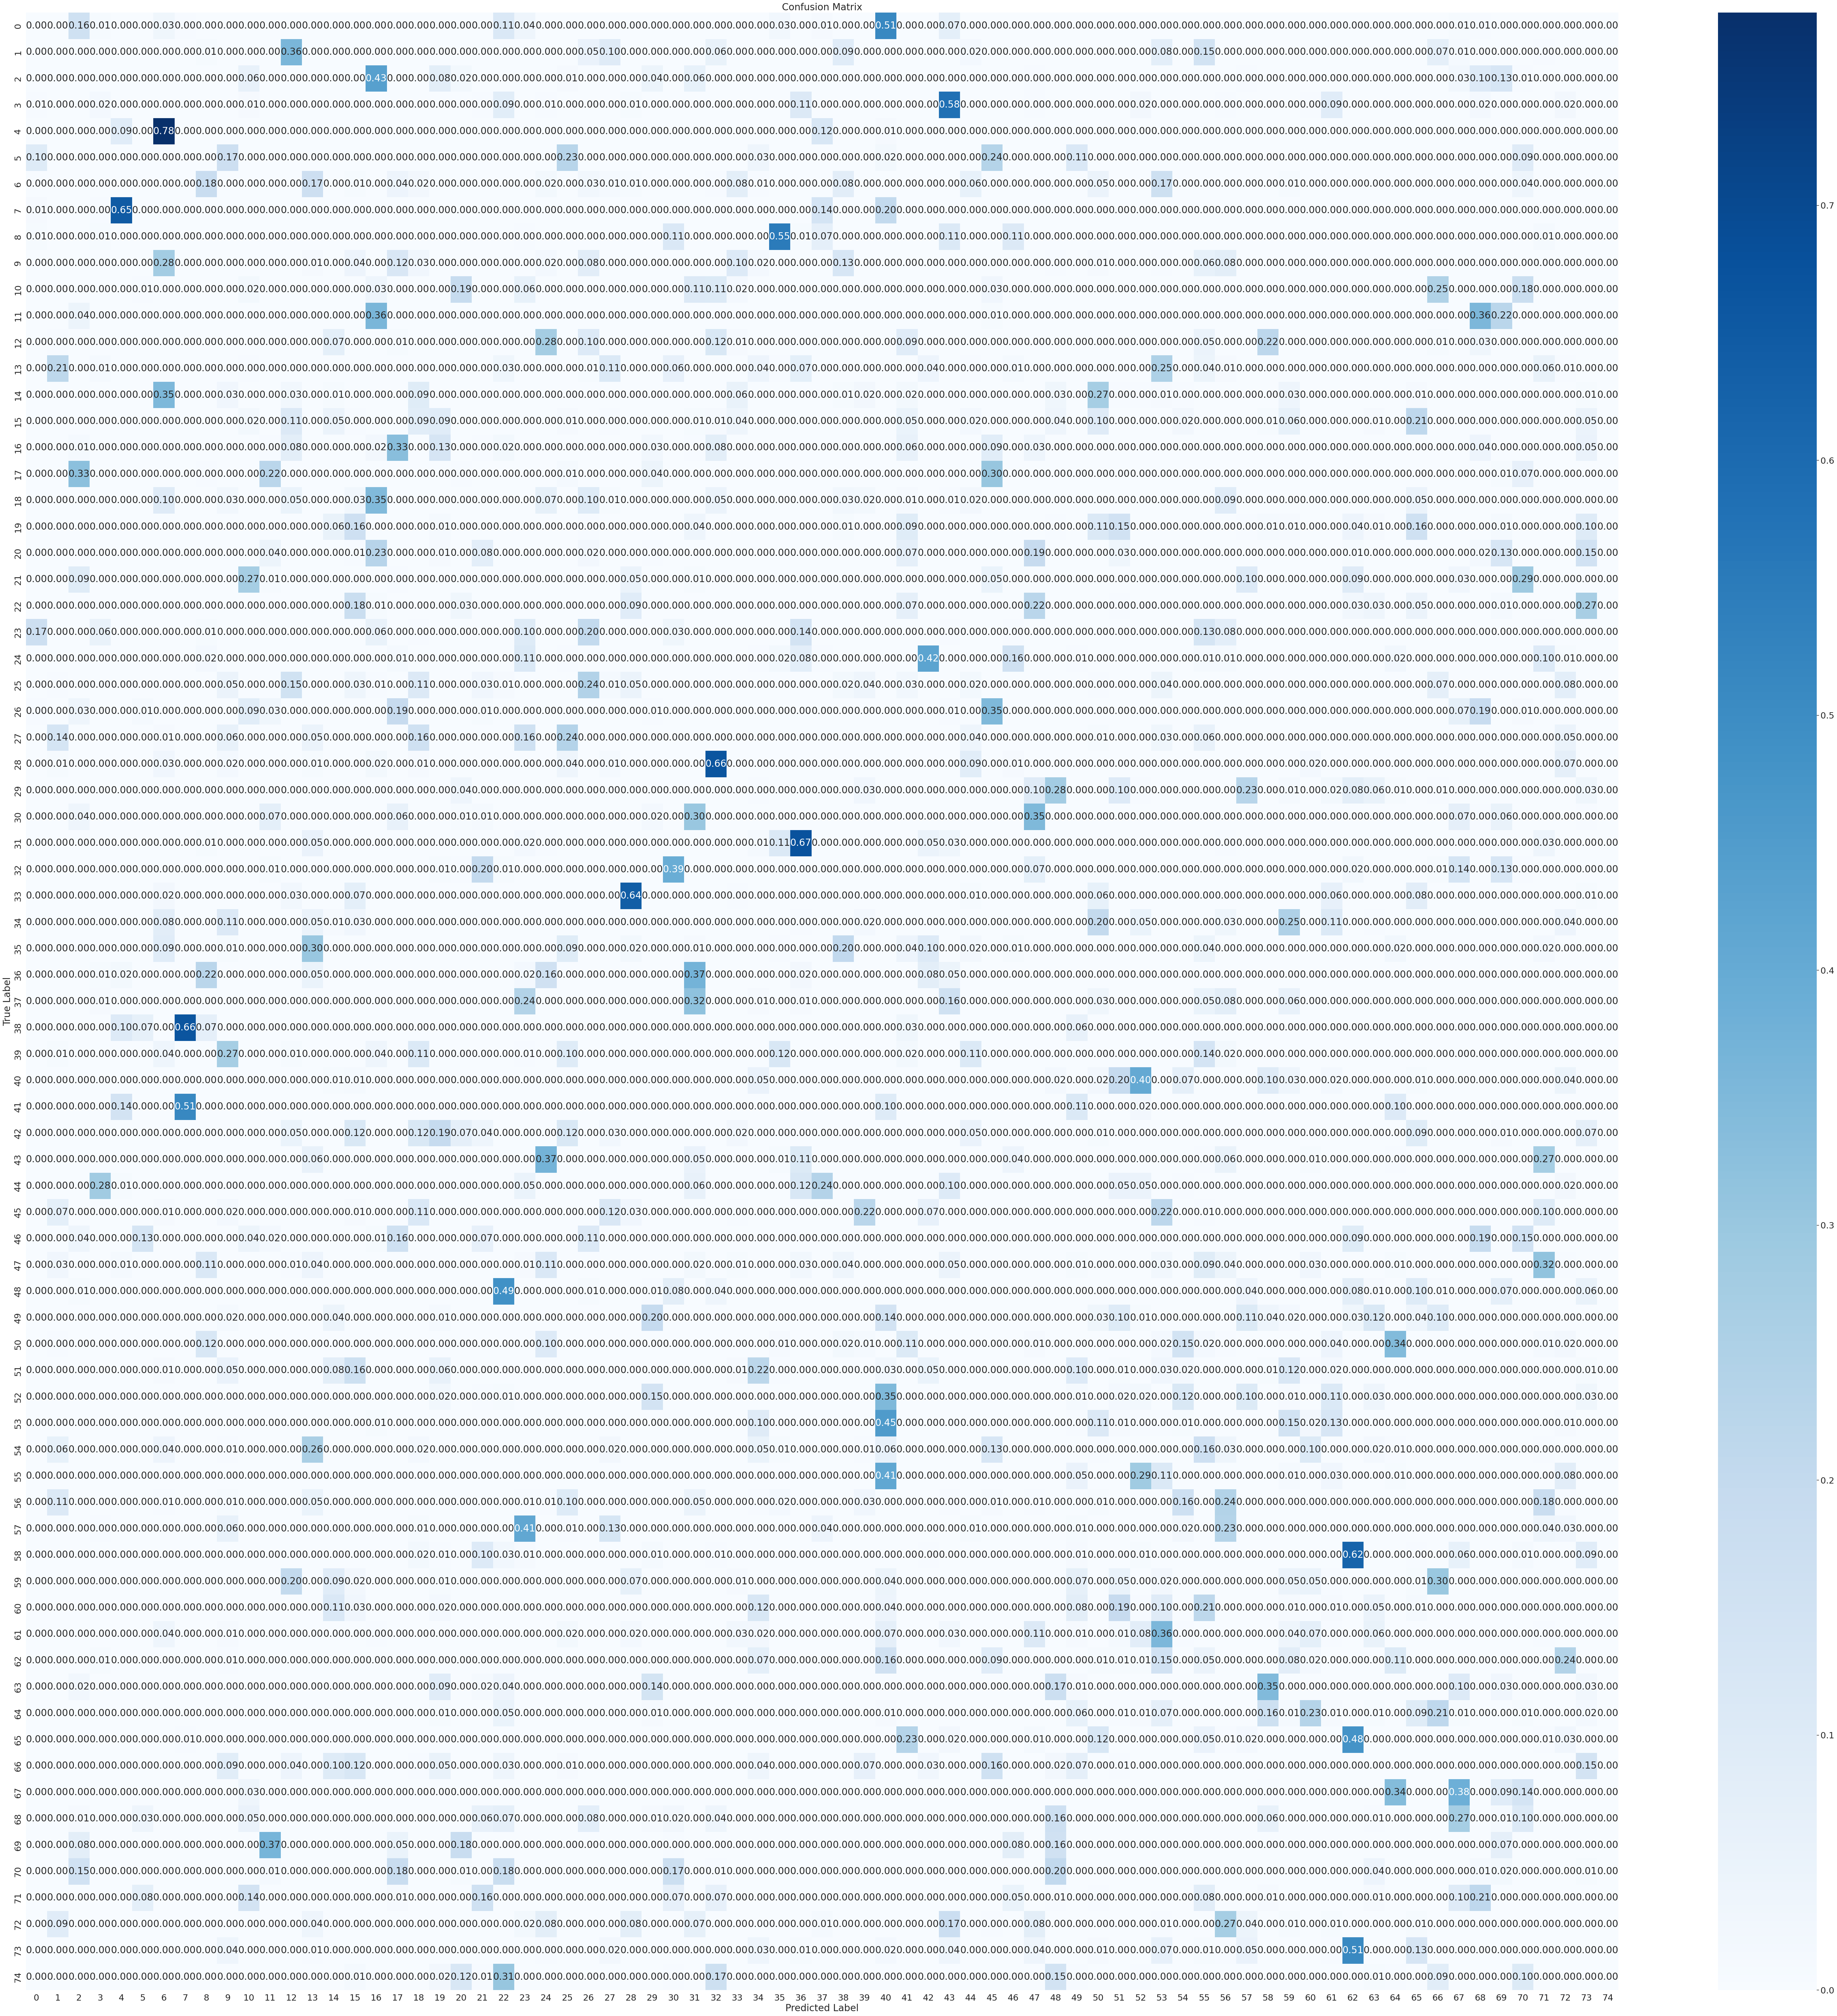

In [19]:
# Plot for standard Set Transformer strong generalization
plot_confusion_matrx(sg_pt_combined_matrix1)

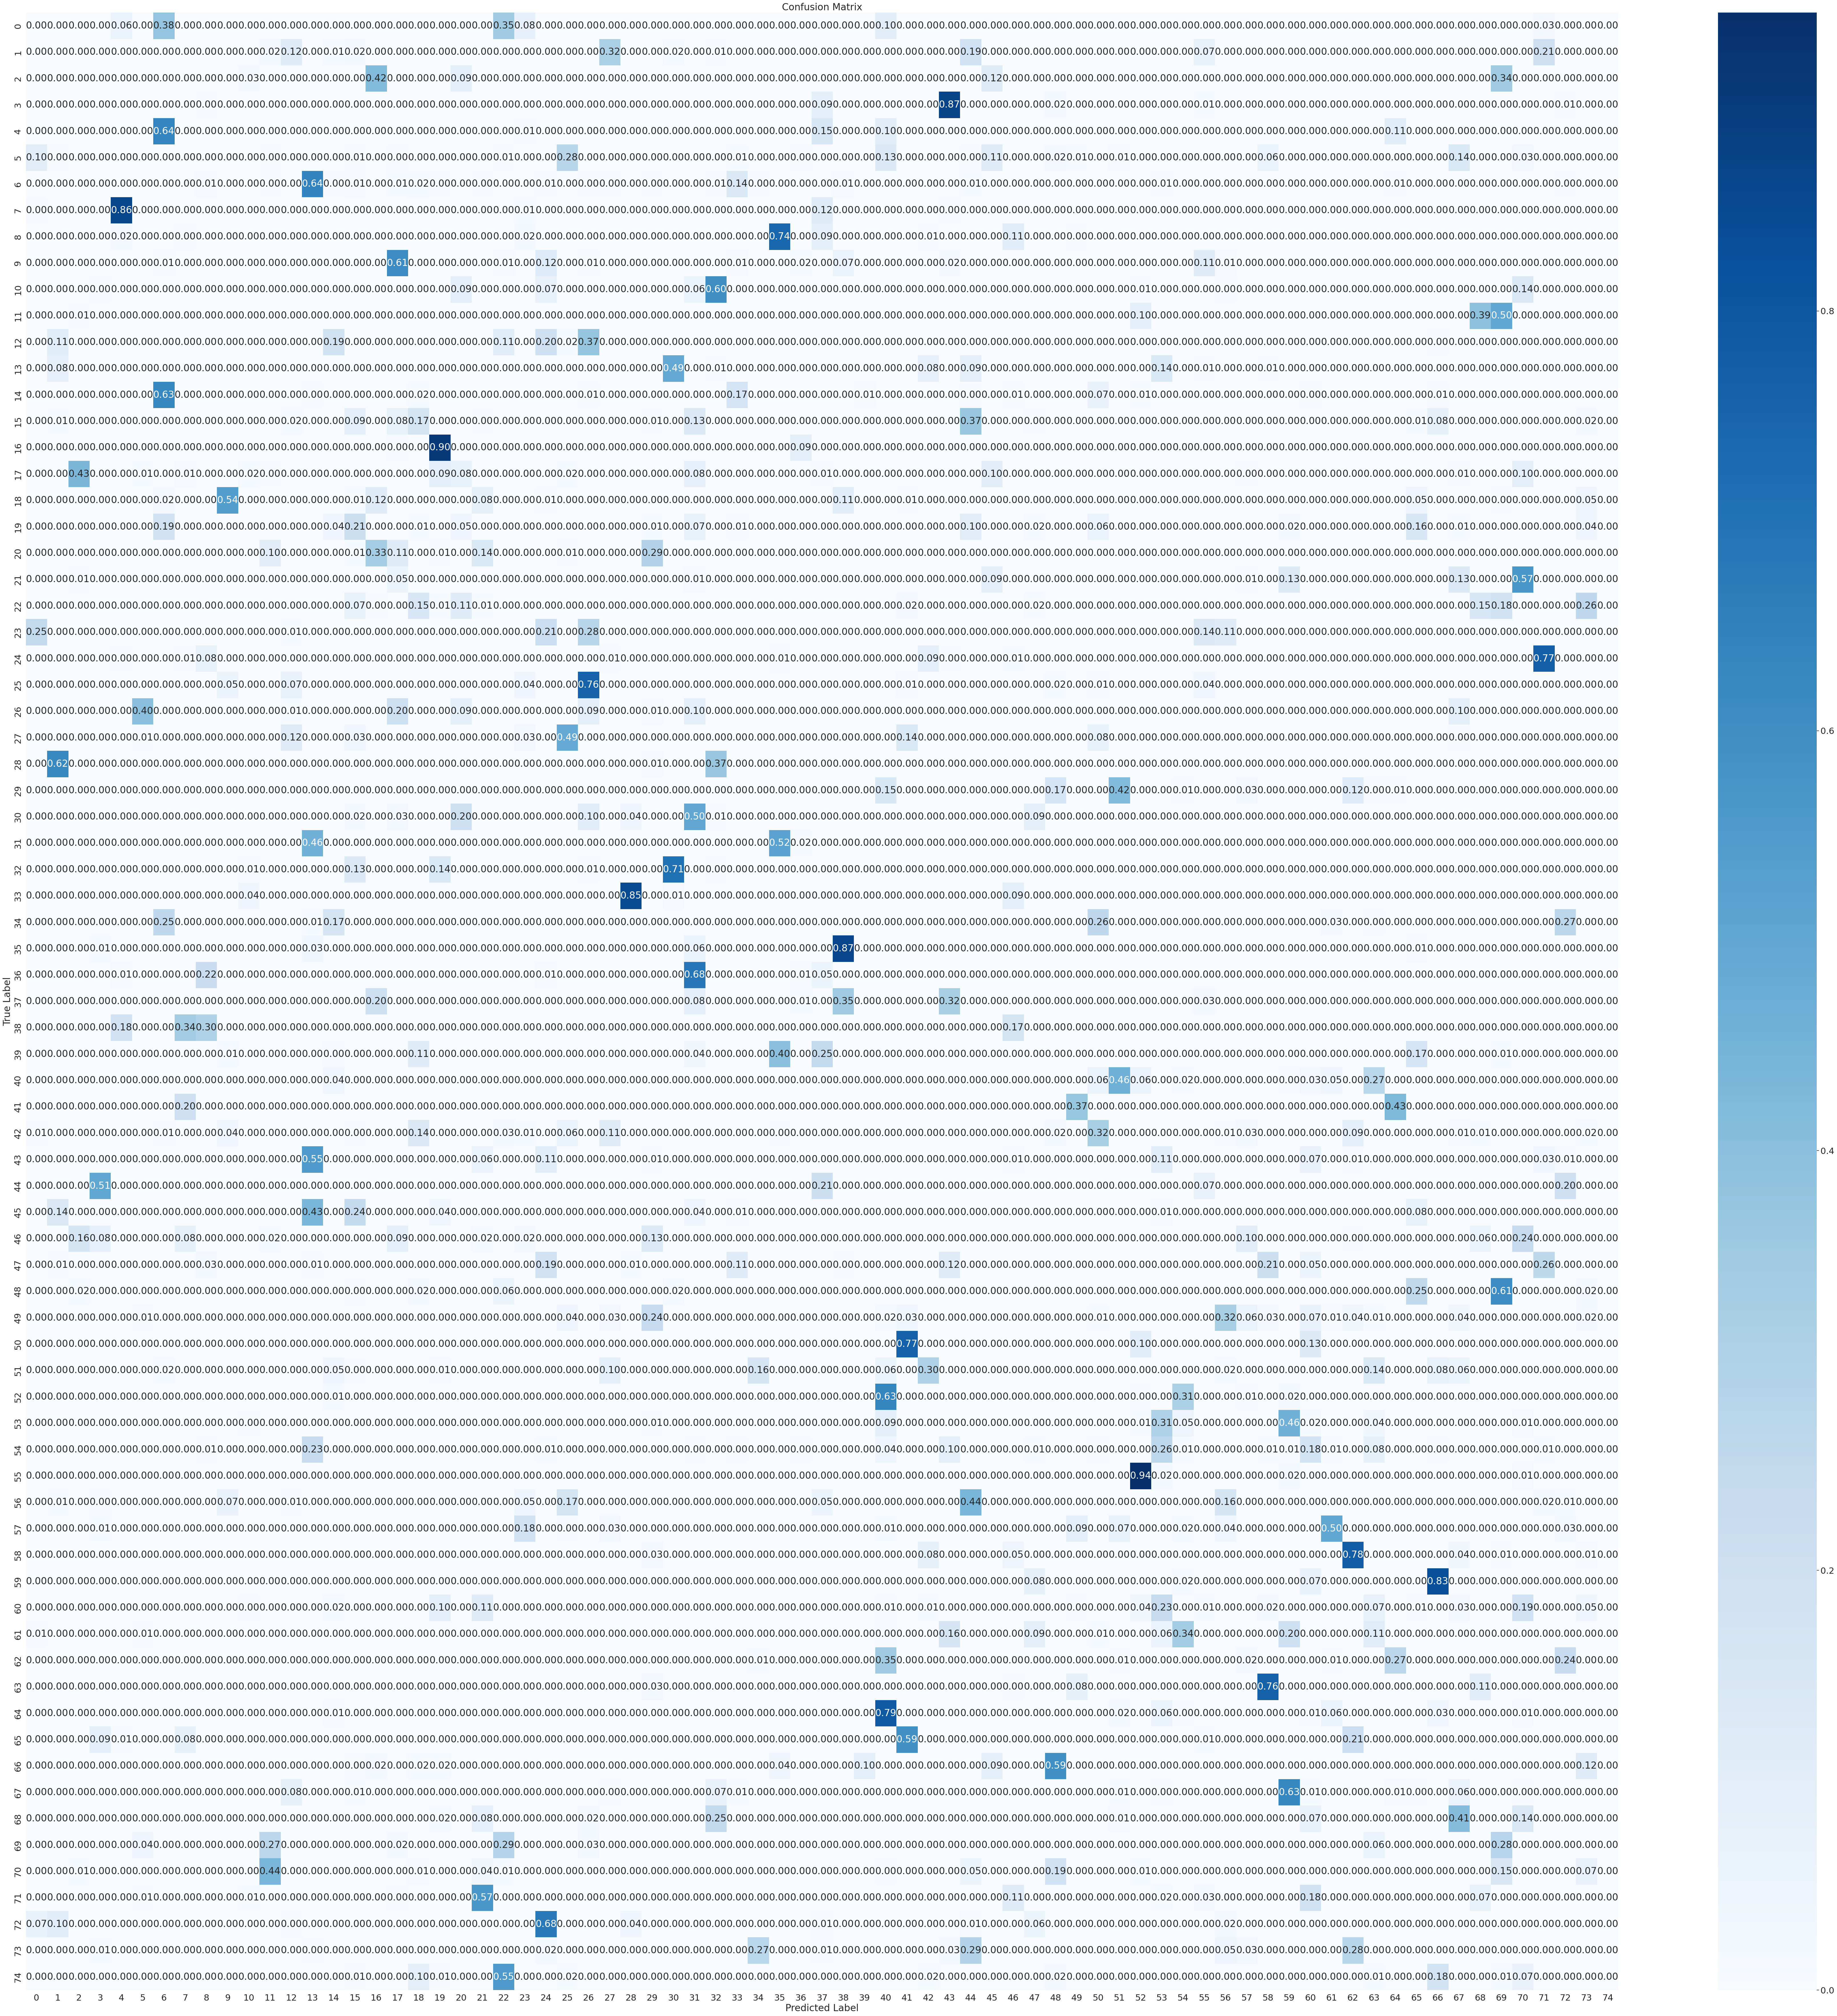

In [20]:
# Plot for standard Contrastive Pre-trained strong generalization
plot_confusion_matrx(sg_pt_combined_matrix2)